# Analiza podatkov: Wikipedia
-----------------
### OPOZORILO: <font color="red">NE</font> pognati celega notebooka!
Nekaj celic se izvaja več kot minuto.

### Vsebina:




In [2]:
from pomozne_funkcije import *
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv.field_size_limit(1000000)
data_frame = pd.read_csv("podatki.csv", sep="¤", engine='python')
FIG_SIZE = (12, 6)

def plot_histogram(series, y_lab=""):
    plt.figure(figsize=FIG_SIZE, dpi=100)
    width = 0.5
    plt.bar(series.index, series.values, width=width)
    plt.bar(series[series.index == 'sl'].index, series[series.index == 'sl'].values, color='red', width=width)
    
    mean_score = series.mean()
    plt.axhline(mean_score, color='red', linestyle='--')
    plt.legend([f"Povprečje: {round(mean_score, 3)}"], loc="lower right")
    
    plt.ylabel(y_lab)
    plt.xticks(rotation=90)
    plt.show()

def plot_histogram_df(df, x_col, y_col, highlight_value, y_lab=""):
    plt.figure(figsize=FIG_SIZE, dpi=100)
    
    mean_score = df[y_col].mean()
    plt.axhline(mean_score, color='red', linestyle='--')
    plt.legend([f"Povprečje: {round(mean_score, 3)}"], loc="lower right")

    data = df[[x_col, y_col]]
    data = data.sort_values(y_col)
    plt.bar(data[x_col], data[y_col])
    if highlight_value in data[x_col].values:
        highlight_index = data[x_col].values.tolist().index(highlight_value)
        plt.bar(data[x_col].iloc[highlight_index], data[y_col].iloc[highlight_index], color='red')
    plt.ylabel(y_lab)
    plt.xticks(rotation=90)
    plt.show()

SyntaxError: invalid syntax (pomozne_funkcije.py, line 248)

In [ ]:
data_frame.head(10) # previmo, če so se podatki pravilno naložili


,jezik,povezave,besedilo
0,sl,77,Wikipedija (angleško Wikipedia) ali Vikipedija...
1,sl,15,Système universitaire de documentation (kratic...
2,sl,35,Wikiknjige (angleško Wikibooks) je sorodni pro...
3,sl,101,Dogovori o poimenovanju so seznam smernic za u...
4,sl,125,To so osnovna navodila in smernice za uporabo ...
5,sl,125,To so osnovna navodila in smernice za uporabo ...
6,sl,62,"Lutka ali marioneta, tudi nogavičnik (izvorno ..."
7,sl,36,\nWikipedija uporablja dve metodi za urejanje:...
8,sl,16,Wikipedija vsebuje veliko število seznamov. Nj...
9,sl,89,Seznam pravil Wikipedije na kratko povzema vsa...


Poglejmo velikost povprečnega članka glede na jezik.
To bomo storili na dva načina. Izračuna povprečni števili:
1. znakov v članku
2. besed v članku

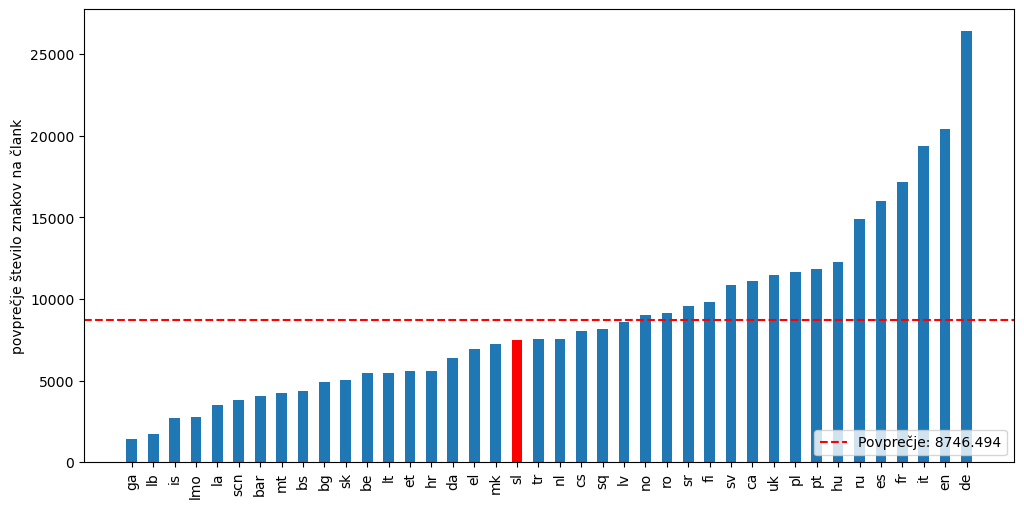

In [ ]:
data_frame['dolzina_1'] = data_frame['besedilo'].apply(lambda x: len(x))
grouped_1 = data_frame.groupby('jezik')['dolzina_1'].sum()/200
grouped_1 = grouped_1.sort_values()
plot_histogram(grouped_1,y_lab="povprečje število znakov na člank")

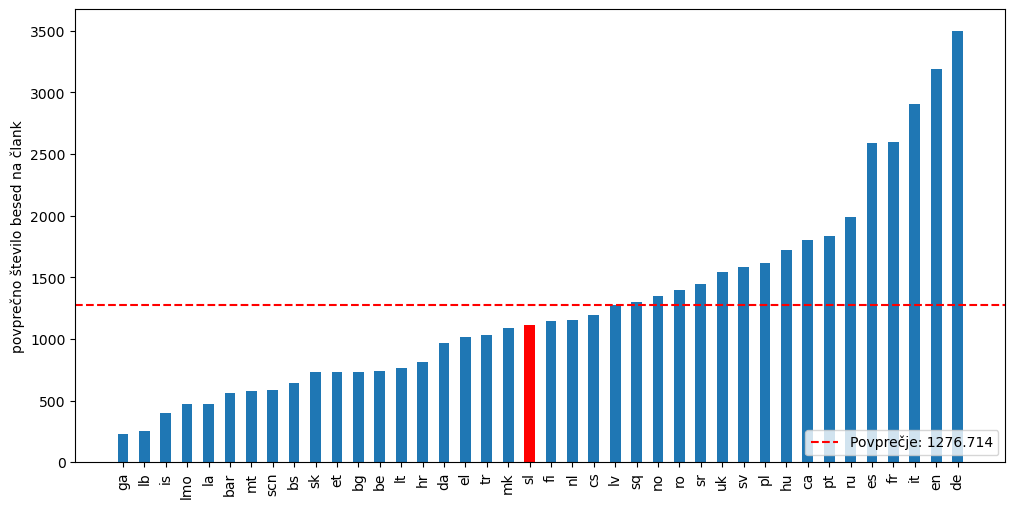

In [ ]:
data_frame['dolzina_2'] = data_frame['besedilo'].apply(lambda x: num_of_spaces(x))
grouped_2 = data_frame.groupby('jezik')['dolzina_2'].sum()/200
grouped_2 =  grouped_2.sort_values()
plot_histogram(grouped_2, y_lab="povprečno število besed na člank")

In [ ]:
grouped_2.tail(10) # izpis držav z največjim povprečnim številom na članek.

jezik
pl    1615.500
hu    1721.255
ca    1803.560
pt    1839.675
ru    1987.670
es    2586.000
fr    2595.215
it    2907.210
en    3193.710
de    3498.255
Name: dolzina_2, dtype: float64

Opazimo, da je prišlo da manjših sprememb v razverstitvah med 1. in 2. histogramom, iz česar lahko sklepamo, da je povprečna dolžina besede različna v različnih jezikih.
Presenetljivo je Nemščina na 1. mestu. 
Kljub temu lahko do neke mere opazimo korelacijo med številom naravnih govorcev in dolžino članka.

Preverimo še povprečno dolžino besed v različnih jezikih.

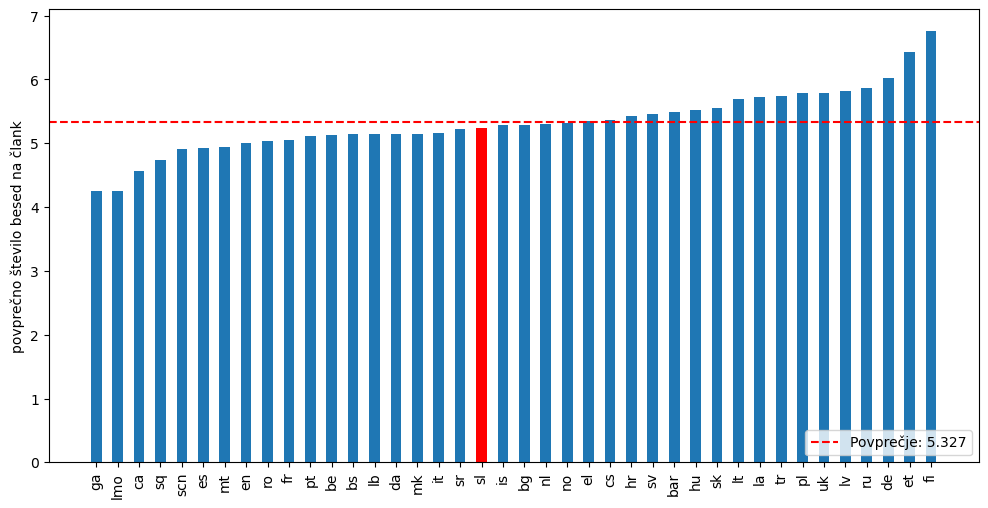

In [ ]:
data_frame['dolzina_3'] = data_frame['besedilo'].apply(lambda x: (avg_word_len(x)))
grouped_3 = data_frame.groupby('jezik')['dolzina_3'].sum()/200
grouped_3 =  grouped_3.sort_values()
plot_histogram(grouped_3, y_lab="povprečno število besed na člank")

Opazimo, da ima večina jezikov povprečje okoli 5 črk na besedo. Med vključenimi jeziki ima najdaljše besede Finščina najkrajše pa Irščina in Lombardščina (sever Italije). 

Poglejmo si še povprečno število hiper povezav. Predvidevam, da bo vrstni red držav glede na število hiperpovezav podoben vrstnemu red dolžine člankov.

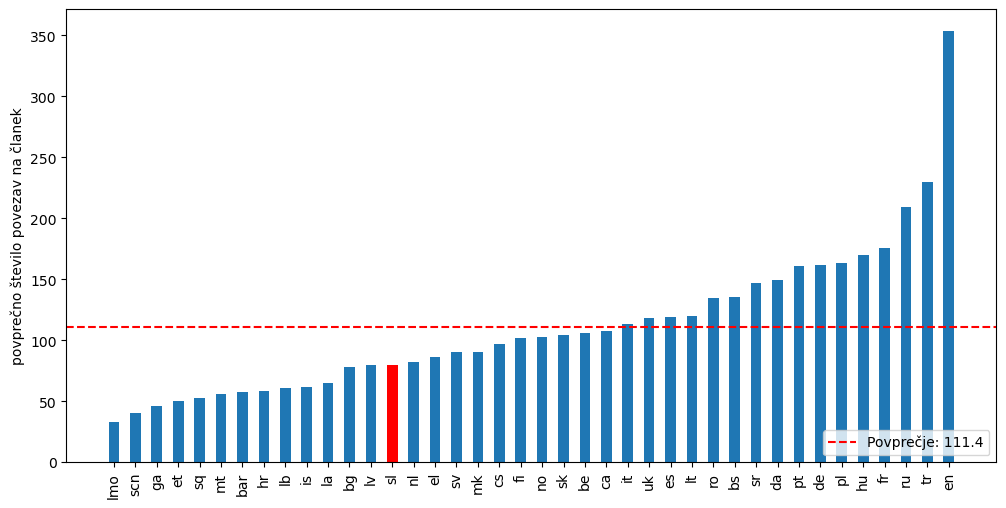

In [ ]:
grouped_3 = data_frame.groupby('jezik')['povezave'].sum()/200
grouped_3 = grouped_3.sort_values()
plot_histogram(grouped_3, y_lab="povprečno število povezav na članek")

In [ ]:
grouped_3.tail(10)

jezik
sr    147.245
da    149.770
pt    161.280
de    162.025
pl    163.150
hu    170.135
fr    175.895
ru    209.715
tr    229.825
en    353.675
Name: povezave, dtype: float64

Opazimo, da je vrstni red premešan. Kljub temu rezultati niso preveč presenetljivi.

<h4>Frekvenčna porazdelitev znakov in besed


Sledi graf frkvenčne porezdelitve znakov.

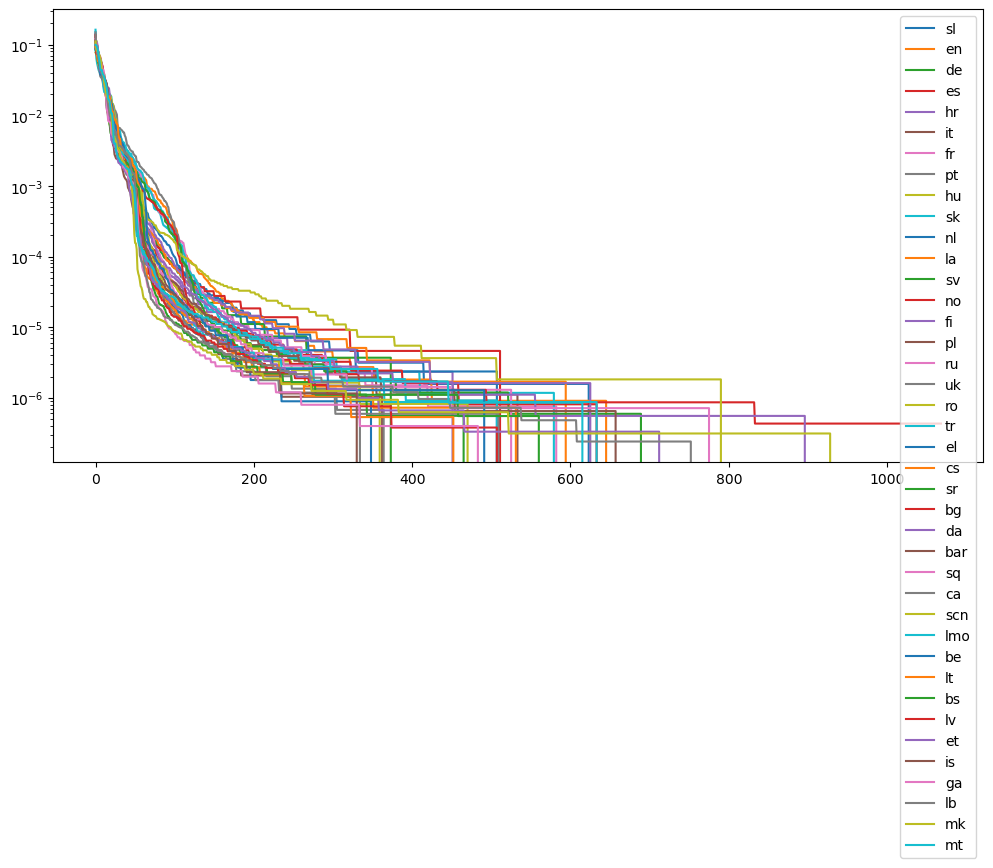

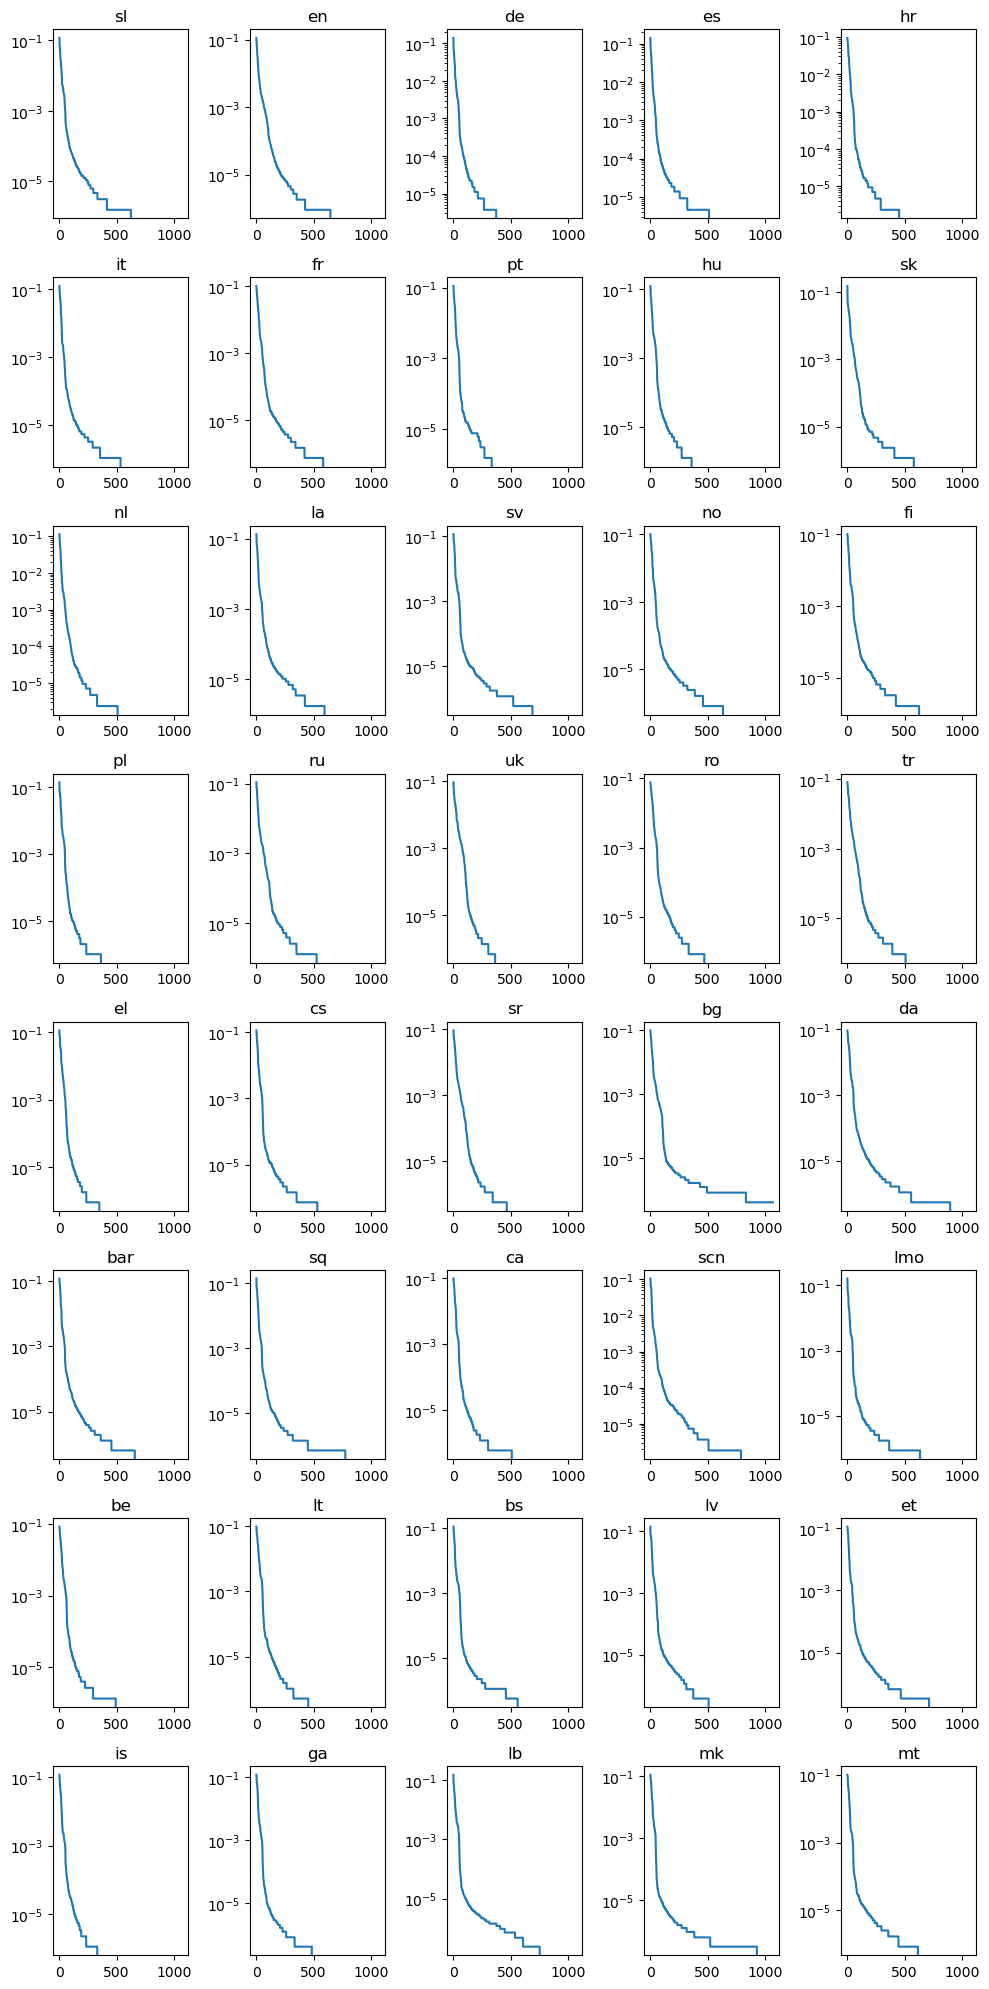

In [ ]:
data = letter_frequency_destribution(data_frame)
plt.figure(figsize=FIG_SIZE, dpi=100)
for lang, y_points in data:
    plt.plot(y_points, label=lang)
plt.yscale("log")
plt.legend()
plt.show()
plt.figure(figsize=(10, 20), dpi=100)
for i, (lang, y_points) in enumerate(data):
    plt.subplot(8, 5, i + 1)
    plt.plot(y_points, label=lang)
    plt.title(lang)
    plt.yscale("log")

plt.tight_layout()
plt.show()


Rezultate je teško interpretirati. Ponovil bom poiskus, kjer bom upošteval le 40 napogosteje se pojavljajočih znakov v vsakem jeziku. Tokrat ne bom razlikoval med velikimi in malimi črkami.

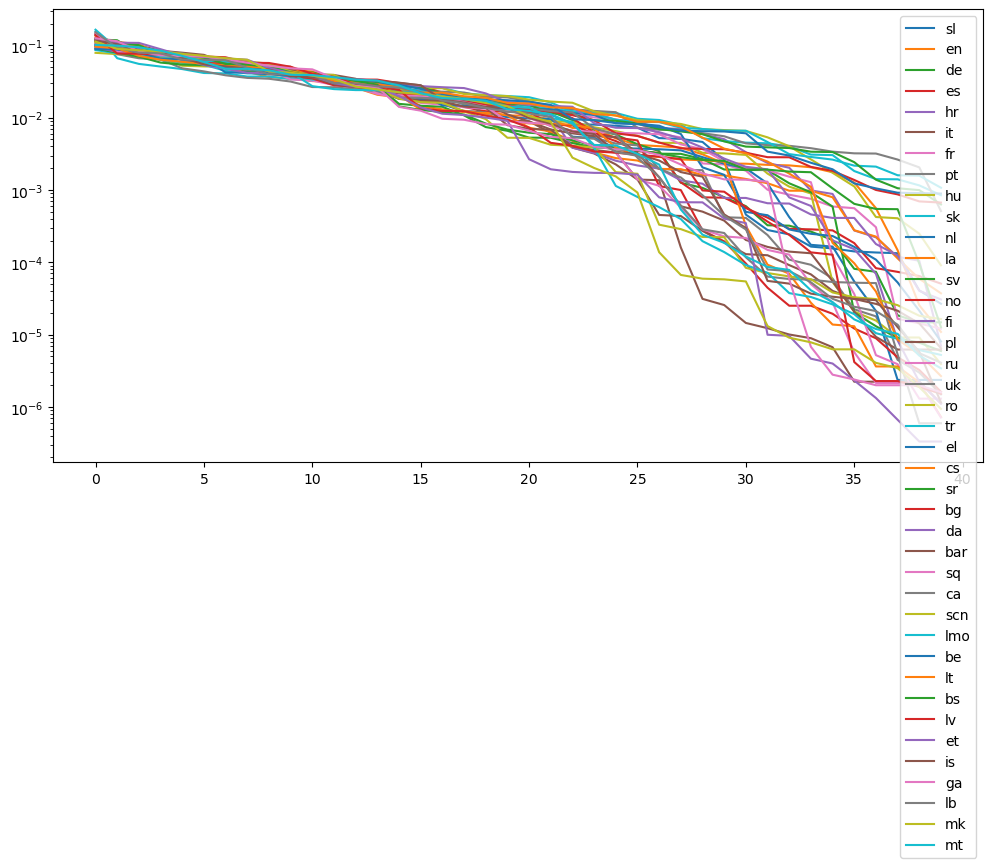

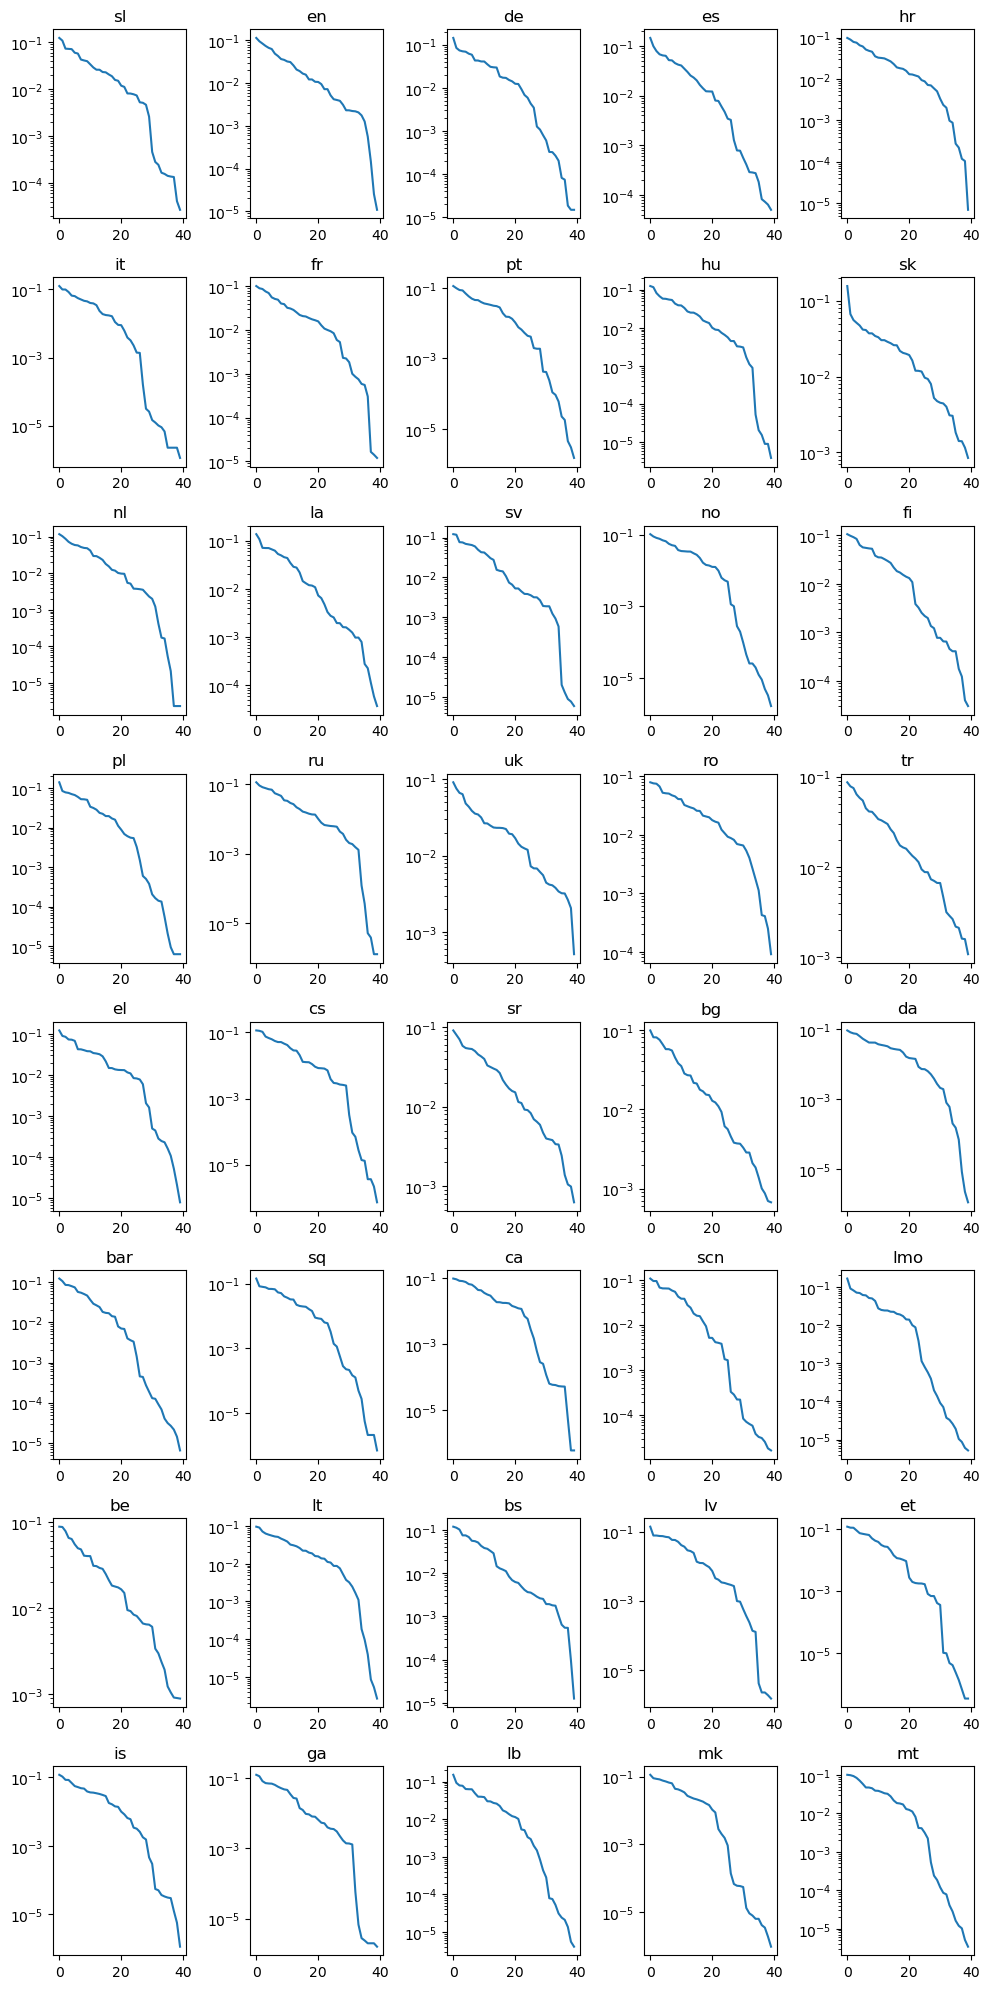

In [ ]:
data = improved_letter_frequency_destribution(data_frame)
plt.figure(figsize=FIG_SIZE, dpi=100)
for lang, y_points in data:
    plt.plot(y_points, label=lang)
plt.yscale("log")
plt.legend()
plt.show()
plt.figure(figsize=(10, 20), dpi=100)
for i, (lang, y_points) in enumerate(data):
    plt.subplot(8, 5, i + 1)
    plt.plot(y_points, label=lang)
    plt.title(lang)
    plt.yscale("log")

plt.tight_layout()
plt.show()

Pri skoraj vseh jezik opazimo, da pogostost prvih nekaj znakov pada linearno (glede na logoritemsko skalo). Zanimivo bi bilo vedeti zakaj so tako velike razlike.

c:\Users\lukad\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


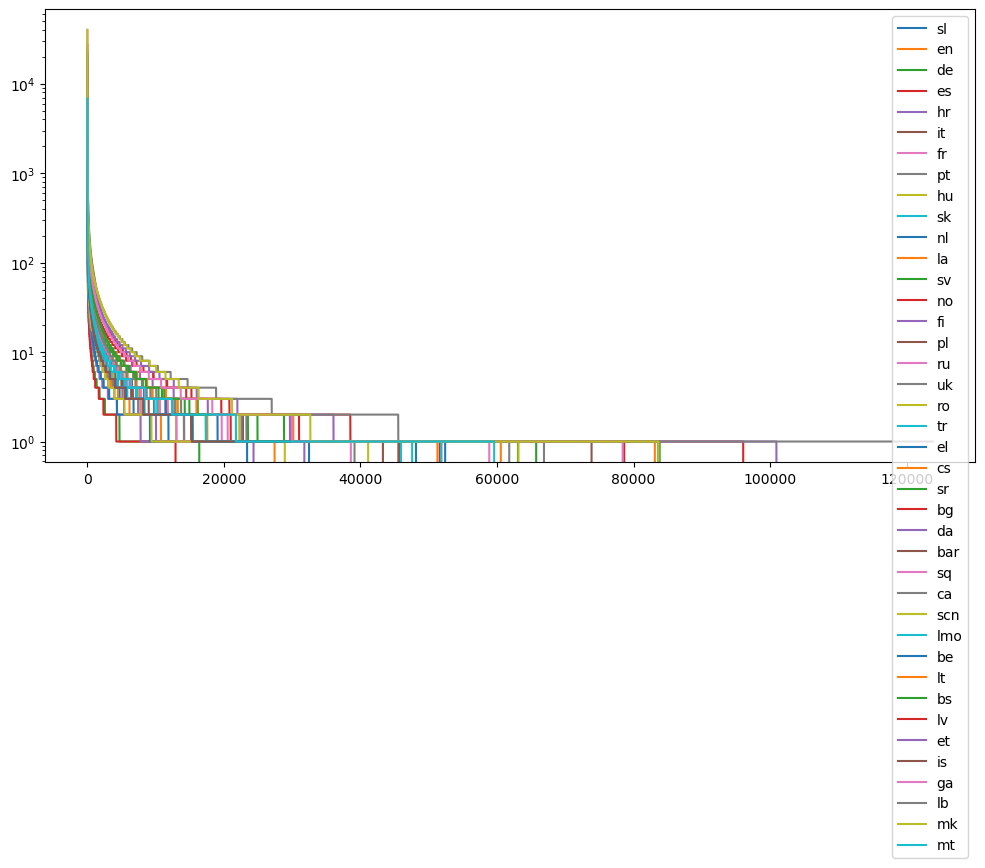

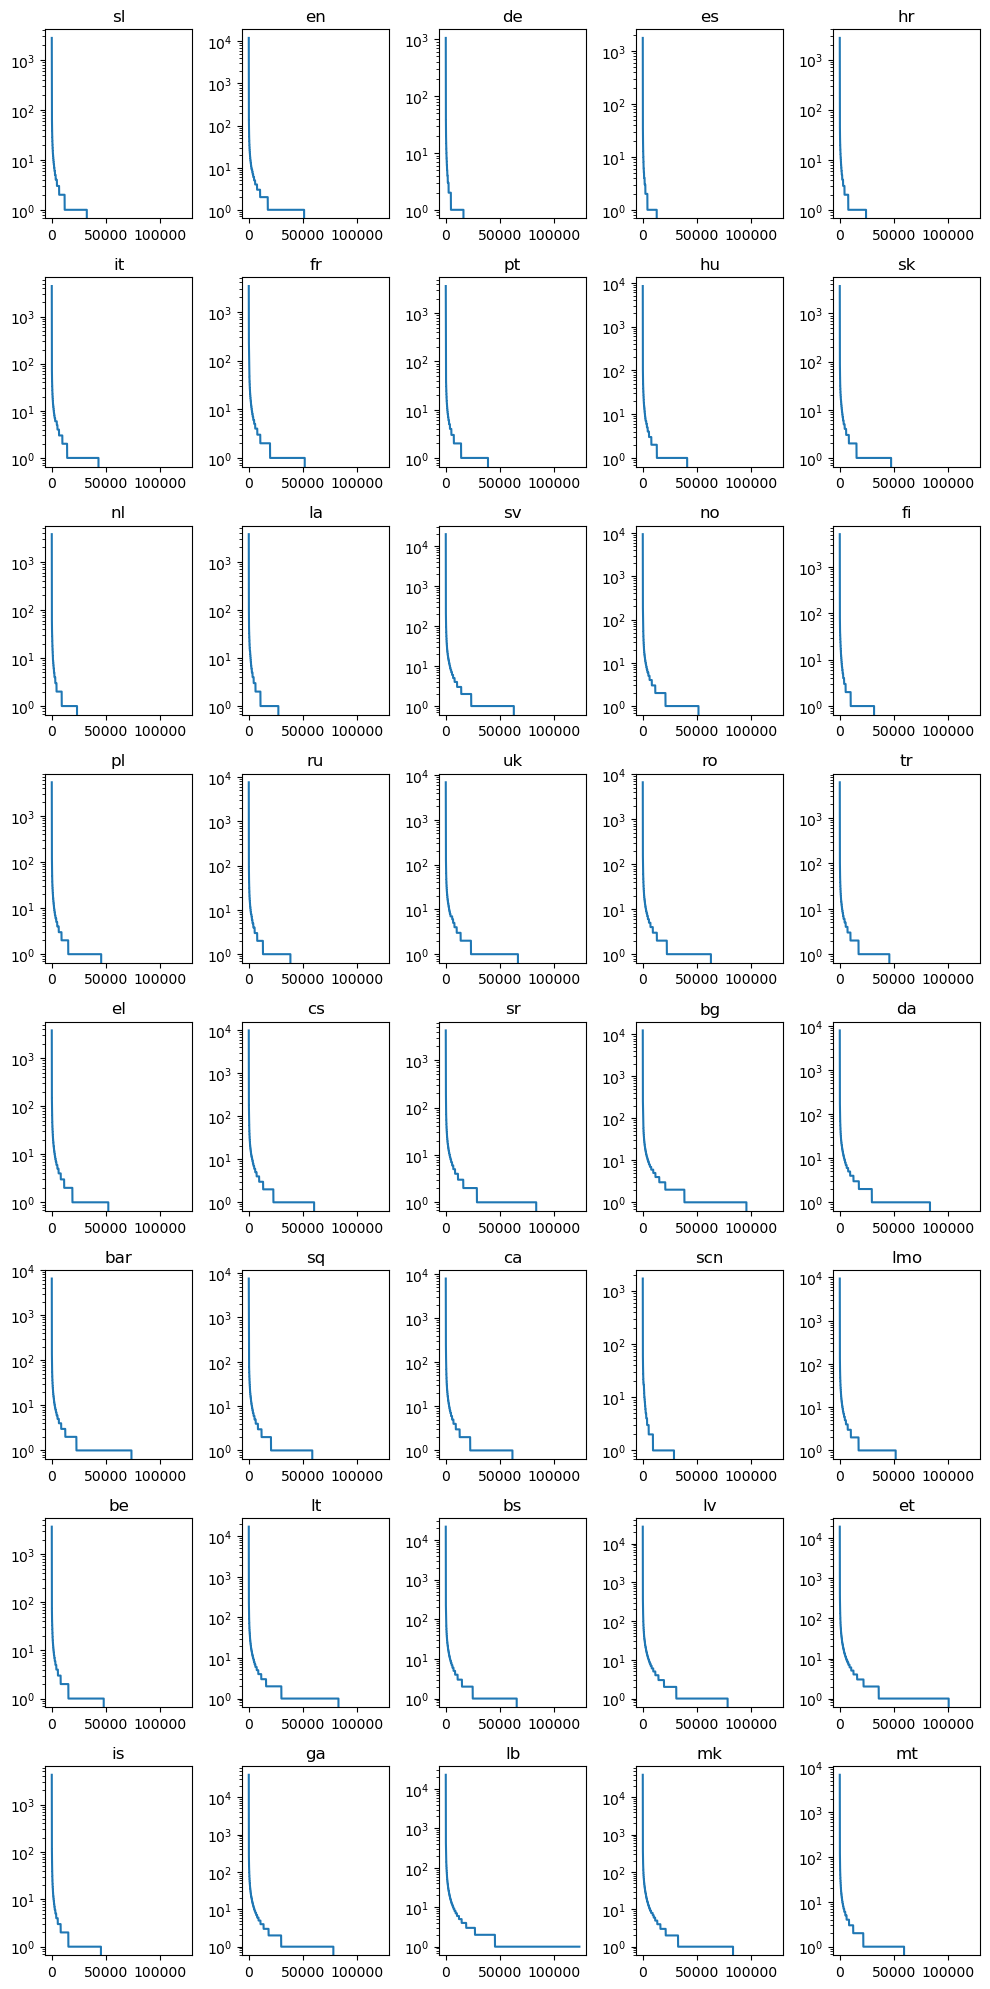

In [ ]:
data = improved_word_frequency_destribution(data_frame)
plt.figure(figsize=FIG_SIZE, dpi=100)
for lang, y_points in data:
    plt.plot(y_points, label=lang)
plt.yscale("log")
plt.legend()
plt.show()
plt.figure(figsize=(10, 20), dpi=100)
for i, (lang, y_points) in enumerate(data):
    plt.subplot(8, 5, i + 1)
    plt.plot(y_points, label=lang)
    plt.title(lang)
    plt.yscale("log")

plt.tight_layout()
plt.show()

<h4>Algoritmično predvidevanje jezika, ki ga opazujemo.

Nasljednji histogrami bodo prikazovali kako uspešno lahko predvidemo v katerem jeziku je bil napisan članek z preprotim bayesovim klasifikatorjem.
Metoda: ločimo članke na dva kupa. Za treniranje jih bomo uporabili 150 in za preverjanje 50. 
Pri prvem bomo gledali zgolj en znak, pri drugem dva zaporedna znaka, pri tretjem tri in pri četrtem štiri.

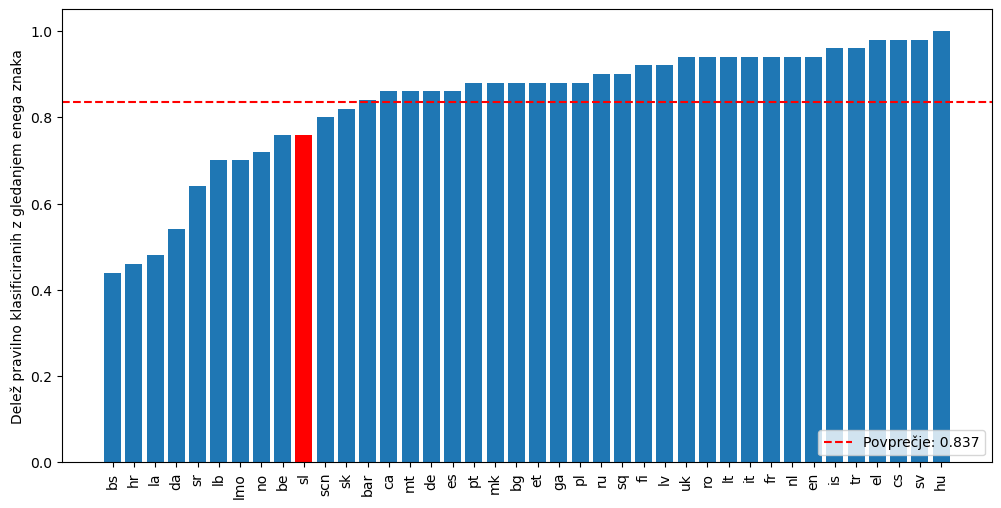

In [ ]:
data_frame_1 = wrap_testing(data_frame, [1], 150, 50)
data_frame_1 = data_frame_1.sort_values("Delež pravilno klasificiranih")
plot_histogram_df(data_frame_1, "Jezik", "Delež pravilno klasificiranih", "sl", y_lab="Delež pravilno klasificiranih z gledanjem enega znaka")

In [ ]:
data_frame_1 = wrap_testing(data_frame, [2], 150, 50)
data_frame_1 = data_frame_1.sort_values("Delež pravilno klasificiranih")
plot_histogram_df(data_frame_1, "Jezik", "Delež pravilno klasificiranih", "sl", y_lab="Delež pravilno klasificiranih z gledanjem dveh znakov")

KeyboardInterrupt: 

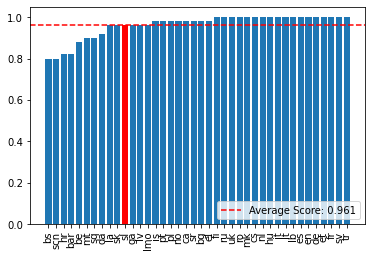

In [ ]:
data_frame_1 = wrap_testing(data_frame, [3], 150, 50)
data_frame_1 = data_frame_1.sort_values("Delež pravilno klasificiranih")
plot_histogram_df(data_frame_1, "Jezik", "Delež pravilno klasificiranih", "sl", y_lab="Delež pravilno klasificiranih z gledanjem enega znaka")

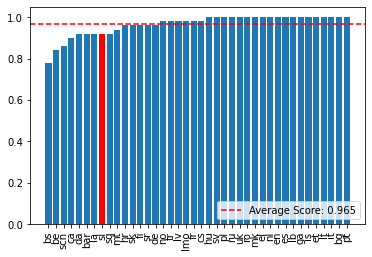

In [ ]:
data_frame_1 = wrap_testing(data_frame, [4]], 150, 50)
data_frame_1 = data_frame_1.sort_values("Delež pravilno klasificiranih")
plot_histogram_df(data_frame_1, "Jezik", "Delež pravilno klasificiranih", "sl", y_lab="Delež pravilno klasificiranih z gledanjem enega znaka")

Rezultati se lahko nekoliko razlikujejo med posameznimi zagoni, saj so podaki ločeni naključno.
Pri tem zagonu smo 84% člankov lahko uganil pravilno z zgolj enim znakom. 
Pri dveh zaporednjih znakih je uspešnost narastla na 94%. 
Pri treh in šterih znakih je natančnost podobna in je okoli 96%.